# Simulation Analyses
---

## Dependencies & Functions

First we load the necessary packages.

In [1]:
# Import packages.
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm

Next we define the functions that we will use in this notebook.

In [2]:
# Define a function to extract observed introgression values.
def load_obs_vals(
    f,
):
    """
    ###########################################################################
    INPUT
        f: Admixture proportion.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of observed introgression values from all replicate
            simulations.
    ###########################################################################
    """
    # Define the file path for the results.
    results_path = './sim_outputs/{0}/obs_vals/'.format(f)
    # Load observed site patterns.
    obs_abba = np.loadtxt(
        results_path+'abba.csv.gz',
        delimiter=',',
    )
    obs_baba = np.loadtxt(
        results_path+'baba.csv.gz',
        delimiter=',',
    )
    obs_baaa = np.loadtxt(
        results_path+'baaa.csv.gz',
        delimiter=',',
    )
    obs_abaa = np.loadtxt(
        results_path+'abaa.csv.gz',
        delimiter=',',
    )
    # Load observed introgression values.
    obs_d = np.loadtxt(
        results_path+'d.csv.gz',
        delimiter=',',
    )
    obs_danc = np.loadtxt(
        results_path+'danc.csv.gz',
        delimiter=',',
    )
    obs_dplus = np.loadtxt(
        results_path+'dplus.csv.gz',
        delimiter=',',
    )
    obs_fhom = np.loadtxt(
        results_path+'fhom.csv.gz',
        delimiter=',',
    )
    obs_fanc = np.loadtxt(
        results_path+'fanc.csv.gz',
        delimiter=',',
    )
    obs_fplus = np.loadtxt(
        results_path+'fplus.csv.gz',
        delimiter=',',
    )
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    obs_vals_dict = {
        'abba': obs_abba, 'baaa': obs_baaa,
        'baba': obs_baba, 'abaa': obs_abaa,
        'd': obs_d,       'danc': obs_danc,
        'fhom': obs_fhom, 'fanc': obs_fanc,
        'dplus': obs_dplus, 'fplus': obs_fplus,
    }
    return obs_vals_dict

In [3]:
# Define a function to calculate the standard deviations of each bootstrapped distribution.
def load_bs_stds(
    f,
):
    """
    ###########################################################################
    INPUT
        f: Admixture proportion.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of standard deviations per bootstrapped distribution.
    ###########################################################################
    """
    # Intialize bootstrapped standard deviation arrays.
    std_d = np.array([])
    std_danc = np.array([])
    std_dplus = np.array([])
    # Calculate the bootstrapped standard deviation for all replicate simulations.
    for rep_id in range(1, 101):
        # Define the file path for the results.
        results_path = './sim_outputs/{0}/bootstraps/rep_id_{1}_'.format(f, rep_id)
        # Load the bootstrapped distributions.
        bs_abba = np.loadtxt(
            results_path+'abba.csv.gz',
            delimiter=',',
        )
        bs_baba = np.loadtxt(
            results_path+'baba.csv.gz',
            delimiter=',',
        )
        bs_baaa = np.loadtxt(
            results_path+'baaa.csv.gz',
            delimiter=',',
        )
        bs_abaa = np.loadtxt(
            results_path+'abaa.csv.gz',
            delimiter=',',
        )
        # Calculate bootstrapped introgression values.
        bs_d = ((bs_abba - bs_baba) / (bs_abba + bs_baba))
        bs_danc = ((bs_baaa - bs_abaa) / (bs_baaa + bs_abaa))
        bs_dplus = (((bs_abba - bs_baba) + (bs_baaa - bs_abaa)) / ((bs_abba + bs_baba) + (bs_baaa + bs_abaa)))
        # Calculate the standard deviations of each bootstrapped distribution.
        bs_std_d = np.std(bs_d)
        bs_std_danc = np.std(bs_danc)
        bs_std_dplus = np.std(bs_dplus)
        # Store the bootstrapped results for the replicate.
        std_d = np.append(std_d, bs_std_d)
        std_danc = np.append(std_danc, bs_std_danc)
        std_dplus = np.append(std_dplus, bs_std_dplus)
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    bs_std_dict = {
        'd': std_d, 'danc': std_danc, 'dplus': std_dplus,
    }
    return bs_std_dict

In [4]:
# Define a function to calculate p-values for introgression detection metrics.
def calc_p_values(
    f,
):
    """
    ###########################################################################
    INPUT
        f: Admixture proportion.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of p-values for introgression detection metrics.
    ###########################################################################
    """
    # Load the observed values.
    obs_dict = load_obs_vals(f)
    # Load the bootstrapped standard deviations.
    bs_dict = load_bs_stds(f)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=obs_dict['d'], loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=obs_dict['danc'], loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=obs_dict['dplus'], loc=0, scale=bs_dict['dplus'])
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    pval_dict = {
        'd': d_pval, 'danc': danc_pval, 'dplus': dplus_pval,
    }
    return pval_dict

In [5]:
# Define a function to calculate power for introgression detection metrics.
def calc_power(
    f,
):
    """
    ###########################################################################
    INPUT
        f: Admixture proportion.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of power values for introgression detection metrics.
    ###########################################################################
    """
    # Load the observed values.
    obs_dict = load_obs_vals(f)
    # Load the bootstrapped standard deviations.
    bs_dict = load_bs_stds(f)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=obs_dict['d'], loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=obs_dict['danc'], loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=obs_dict['dplus'], loc=0, scale=bs_dict['dplus'])
    # Calculate the power ie the number of significant replicates out of 100.
    d_power = np.mean(d_pval <= 0.05 )
    danc_power = np.mean(danc_pval <= 0.05 )
    dplus_power = np.mean(dplus_pval <= 0.05 )
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    power_dict = {
        'd': d_power, 'danc': danc_power, 'dplus': dplus_power,
    }
    return power_dict

In [6]:
# LaTeX plotting helper function provided by Jack Walton (https://jwalton.info/Embed-Publication-Matplotlib-Latex/).
def set_size(width_pt=452, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27
    # Golden ratio to set aesthetic figure height.
    golden_ratio = (5**.5 - 1) / 2
    # Figure width in inches.
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches.
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])
    return (fig_width_in, fig_height_in)

Lastly, we load all of the observed values for analysis.

In [7]:
# Load observed values.
obs_dict_f00 = load_obs_vals(0.0)
obs_dict_f01 = load_obs_vals(0.01)
obs_dict_f02 = load_obs_vals(0.02)
obs_dict_f03 = load_obs_vals(0.03)
obs_dict_f04 = load_obs_vals(0.04)
obs_dict_f05 = load_obs_vals(0.05)
obs_dict_f06 = load_obs_vals(0.06)
obs_dict_f07 = load_obs_vals(0.07)
obs_dict_f08 = load_obs_vals(0.08)
obs_dict_f09 = load_obs_vals(0.09)
obs_dict_f10 = load_obs_vals(0.1)
obs_dict_f20 = load_obs_vals(0.2)
obs_dict_f30 = load_obs_vals(0.3)
obs_dict_f40 = load_obs_vals(0.4)
obs_dict_f50 = load_obs_vals(0.5)

## Site Pattern Trends

First, we consolidate the site pattern counts and calculate the differences.

In [8]:
# Consolidate the abba counts.
small_abba = [
    obs_dict_f00['abba'],
    obs_dict_f01['abba'],
    obs_dict_f02['abba'],
    obs_dict_f03['abba'],
    obs_dict_f04['abba'],
    obs_dict_f05['abba'],
    obs_dict_f06['abba'],
    obs_dict_f07['abba'],
    obs_dict_f08['abba'],
    obs_dict_f09['abba'],
    obs_dict_f10['abba'],
]
big_abba = [
    obs_dict_f00['abba'],
    obs_dict_f10['abba'],
    obs_dict_f20['abba'],
    obs_dict_f30['abba'],
    obs_dict_f40['abba'],
    obs_dict_f50['abba'],
]
# Consolidate the baba counts.
small_baba = [
    obs_dict_f00['baba'],
    obs_dict_f01['baba'],
    obs_dict_f02['baba'],
    obs_dict_f03['baba'],
    obs_dict_f04['baba'],
    obs_dict_f05['baba'],
    obs_dict_f06['baba'],
    obs_dict_f07['baba'],
    obs_dict_f08['baba'],
    obs_dict_f09['baba'],
    obs_dict_f10['baba'],
]
big_baba = [
    obs_dict_f00['baba'],
    obs_dict_f10['baba'],
    obs_dict_f20['baba'],
    obs_dict_f30['baba'],
    obs_dict_f40['baba'],
    obs_dict_f50['baba'],
]
# Calculate abba-baba counts.
small_abba_baba = np.array(small_abba) - np.array(small_baba)
big_abba_baba = np.array(big_abba) - np.array(big_baba)
# Consolidate the baaa counts.
small_baaa = [
    obs_dict_f00['baaa'],
    obs_dict_f01['baaa'],
    obs_dict_f02['baaa'],
    obs_dict_f03['baaa'],
    obs_dict_f04['baaa'],
    obs_dict_f05['baaa'],
    obs_dict_f06['baaa'],
    obs_dict_f07['baaa'],
    obs_dict_f08['baaa'],
    obs_dict_f09['baaa'],
    obs_dict_f10['baaa'],
]
big_baaa = [
    obs_dict_f00['baaa'],
    obs_dict_f10['baaa'],
    obs_dict_f20['baaa'],
    obs_dict_f30['baaa'],
    obs_dict_f40['baaa'],
    obs_dict_f50['baaa'],
]
# Consolidate the abaa counts.
small_abaa = [
    obs_dict_f00['abaa'],
    obs_dict_f01['abaa'],
    obs_dict_f02['abaa'],
    obs_dict_f03['abaa'],
    obs_dict_f04['abaa'],
    obs_dict_f05['abaa'],
    obs_dict_f06['abaa'],
    obs_dict_f07['abaa'],
    obs_dict_f08['abaa'],
    obs_dict_f09['abaa'],
    obs_dict_f10['abaa'],
]
big_abaa = [
    obs_dict_f00['abaa'],
    obs_dict_f10['abaa'],
    obs_dict_f20['abaa'],
    obs_dict_f30['abaa'],
    obs_dict_f40['abaa'],
    obs_dict_f50['abaa'],
]
# Calculate baaa-abaa counts.
small_baaa_abaa = np.array(small_baaa) - np.array(small_abaa)
big_baaa_abaa = np.array(big_baaa) - np.array(big_abaa)

Next, we assess if the mean site pattern differences are statistically significant.

In [9]:
# Create p-value arrays for the site pattern differences.
small_ttest_pvals = np.array([
    stats.ttest_ind(small_abba_baba[0], small_baaa_abaa[0], equal_var=False)[1],
    stats.ttest_ind(small_abba_baba[1], small_baaa_abaa[1], equal_var=False)[1],
    stats.ttest_ind(small_abba_baba[2], small_baaa_abaa[2], equal_var=False)[1],
    stats.ttest_ind(small_abba_baba[3], small_baaa_abaa[3], equal_var=False)[1],
    stats.ttest_ind(small_abba_baba[4], small_baaa_abaa[4], equal_var=False)[1],
    stats.ttest_ind(small_abba_baba[5], small_baaa_abaa[5], equal_var=False)[1],
    stats.ttest_ind(small_abba_baba[6], small_baaa_abaa[6], equal_var=False)[1],
    stats.ttest_ind(small_abba_baba[7], small_baaa_abaa[7], equal_var=False)[1],
    stats.ttest_ind(small_abba_baba[8], small_baaa_abaa[8], equal_var=False)[1],
    stats.ttest_ind(small_abba_baba[9], small_baaa_abaa[9], equal_var=False)[1],
    stats.ttest_ind(small_abba_baba[10], small_baaa_abaa[10], equal_var=False)[1],
])
big_ttest_pvals = np.array([
    stats.ttest_ind(big_abba_baba[0], big_baaa_abaa[0], equal_var=False)[1],
    stats.ttest_ind(big_abba_baba[1], big_baaa_abaa[1], equal_var=False)[1],
    stats.ttest_ind(big_abba_baba[2], big_baaa_abaa[2], equal_var=False)[1],
    stats.ttest_ind(big_abba_baba[3], big_baaa_abaa[3], equal_var=False)[1],
    stats.ttest_ind(big_abba_baba[4], big_baaa_abaa[4], equal_var=False)[1],
    stats.ttest_ind(big_abba_baba[5], big_baaa_abaa[5], equal_var=False)[1],
])
# Intialize an array of small admixture proportions.
small_admix_props = np.array([
    r'$f = 0$', r'$f = 0.01$', r'$f = 0.02$',
    r'$f = 0.03$', r'$f = 0.04$', r'$f = 0.05$',
    r'$f = 0.06$', r'$f = 0.07$', r'$f = 0.08$',
    r'$f = 0.09$', r'$f = 0.1$',
])
# Intialize an array of big admixture proportions.
big_admix_props = np.array([
    r'$f = 0$', r'$f = 0.1$', r'$f = 0.2$',
    r'$f = 0.3$', r'$f = 0.4$', r'$f = 0.5$',
])
# Create a pandas dataframe for the small admixture proportions results.
small_ttest_pvals_df = pd.DataFrame(
    data={
        r'$ABBA-BABA$': np.mean(small_abba_baba, axis=1),
        r'$BAAA-ABAA$': np.mean(small_baaa_abaa, axis=1),
        r'$P-value$': small_ttest_pvals,
    },
    index=small_admix_props,
)
small_ttest_pvals_df = small_ttest_pvals_df.style.format(precision=3)
# Write this pandas dataframe to a .tex file.
with open('./tables/small_site_pattern_diff.tex', 'w') as tex_table:
    tex_table.write(small_ttest_pvals_df.to_latex(column_format='lccc', hrules=True))
# Create a pandas dataframe for the big admixture proportions results.
big_ttest_pvals_df = pd.DataFrame(
    data={
        r'$ABBA-BABA$': np.mean(big_abba_baba, axis=1),
        r'$BAAA-ABAA$': np.mean(big_baaa_abaa, axis=1),
        r'$P-value$': big_ttest_pvals,
    },
    index=big_admix_props,
)
big_ttest_pvals_df = big_ttest_pvals_df.style.format(precision=3)
# Write this pandas dataframe to a .tex file.
with open('./tables/big_site_pattern_diff.tex', 'w') as tex_table:
    tex_table.write(big_ttest_pvals_df.to_latex(column_format='lccc', hrules=True))

Now we view the results.

In [10]:
# View the power results for f = 0 to f = 0.1 .
small_ttest_pvals_df

,$ABBA-BABA$,$BAAA-ABAA$,$P-value$
$f = 0$,-29.890,-37.880,0.828
$f = 0.01$,235.220,250.300,0.720
$f = 0.02$,428.630,397.750,0.482
$f = 0.03$,663.450,661.680,0.966
$f = 0.04$,887.260,908.180,0.627
$f = 0.05$,1055.770,1057.230,0.974
$f = 0.06$,1316.210,1240.840,0.176
$f = 0.07$,1535.050,1525.950,0.862
$f = 0.08$,1741.800,1744.610,0.955
$f = 0.09$,1957.570,1927.850,0.599


In [11]:
# View the power results for f = 0 to f = 0.5 .
big_ttest_pvals_df

,$ABBA-BABA$,$BAAA-ABAA$,$P-value$
$f = 0$,-29.890,-37.880,0.828
$f = 0.1$,2136.390,2141.060,0.934
$f = 0.2$,4315.800,4318.300,0.970
$f = 0.3$,6462.660,6499.070,0.628
$f = 0.4$,8569.550,8557.090,0.883
$f = 0.5$,10719.300,10734.410,0.867


Lastly, we plot!

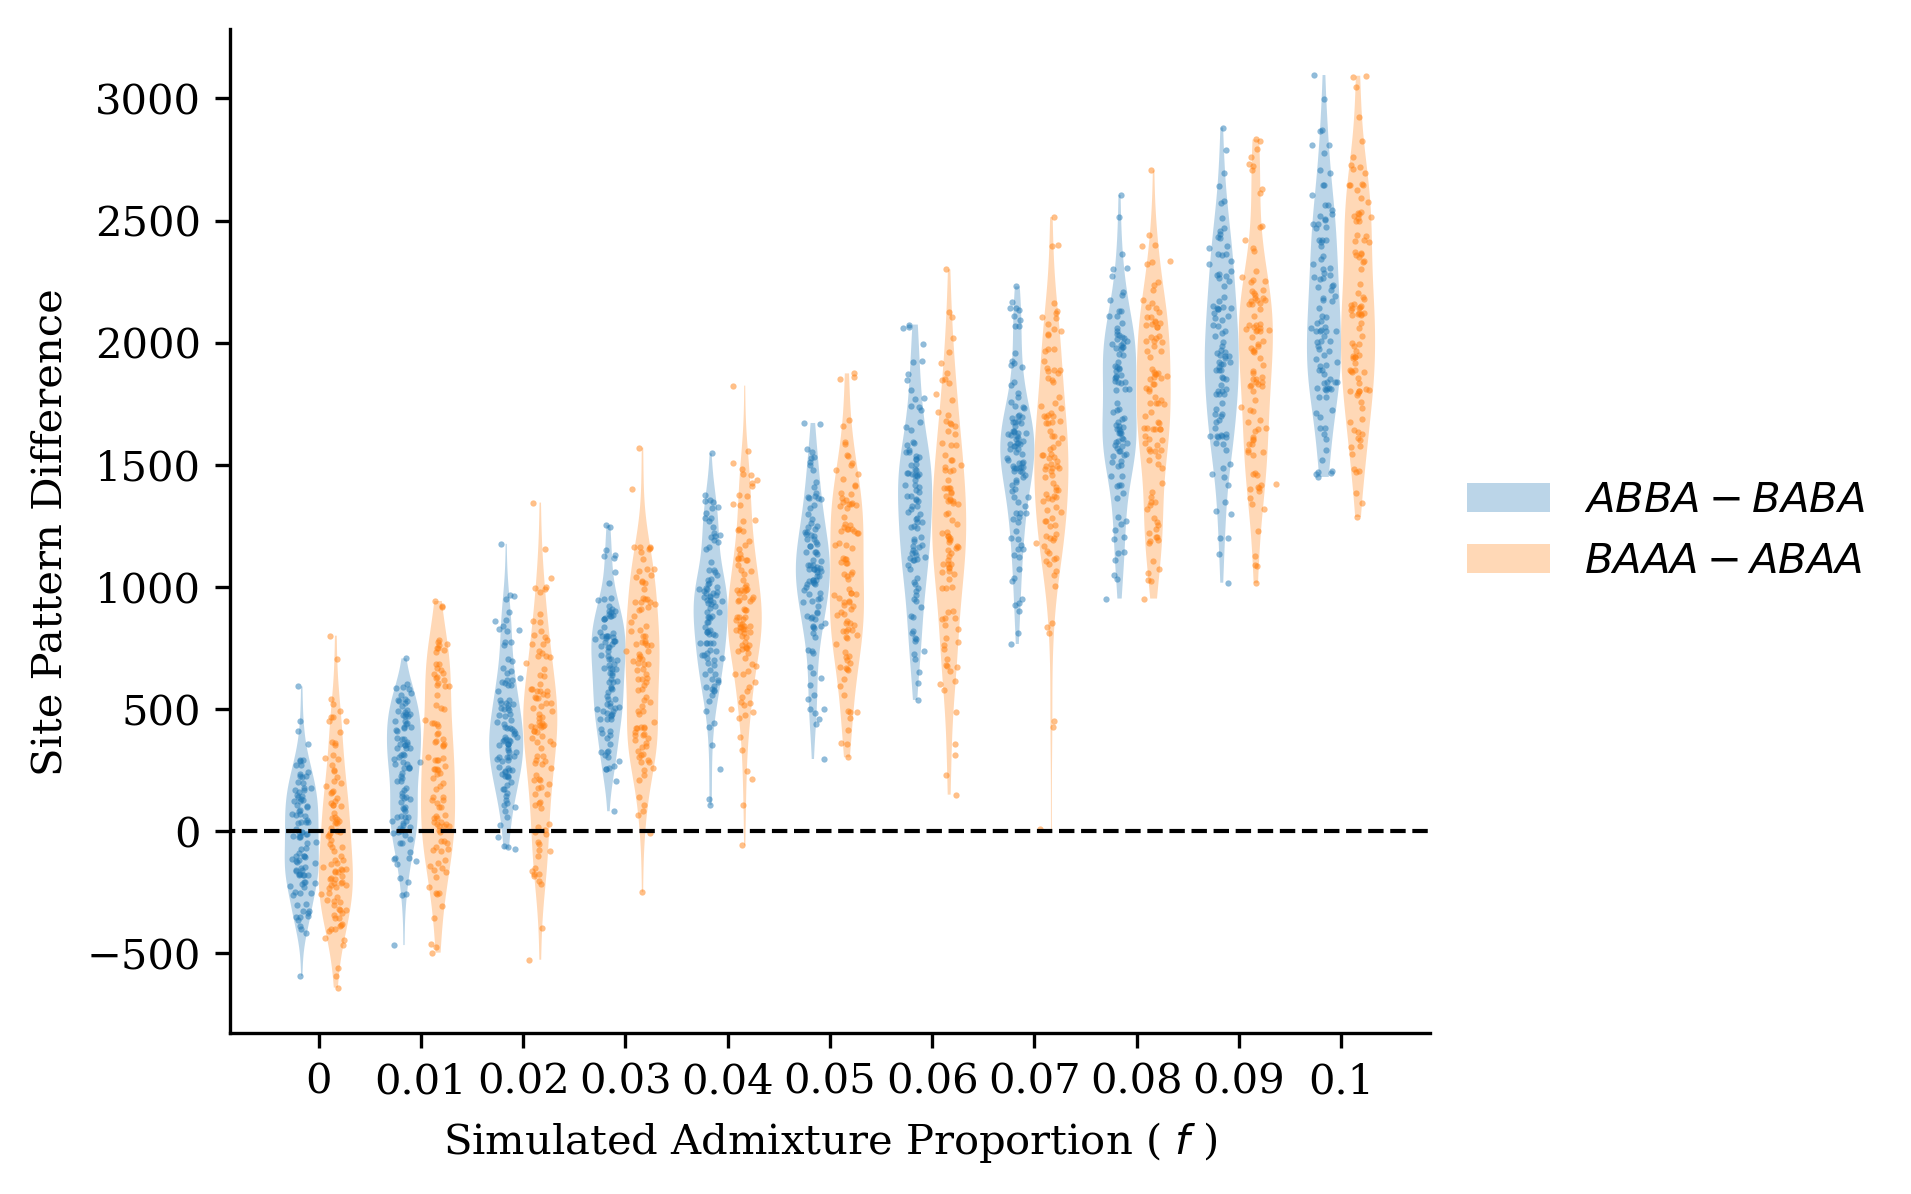

In [12]:
# Intialize list of x-axis tick labels.
small_x_ticks = [
    '0', '0.01', '0.02',
    '0.03', '0.04', '0.05',
    '0.06', '0.07', '0.08',
    '0.09', '0.1',
]
# Set the center positions.
small_oirginal_pos = np.arange(0, 33, 3)
small_center_pos = (small_oirginal_pos + 0.5)
# Set the positions for the abba-baba results.
small_abba_baba_pos = small_oirginal_pos
# Set the positions for the baaa-abaa results.
small_baaa_abaa_pos = (small_oirginal_pos + 1)
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure.
fig = plt.figure(figsize=set_size(width_pt=452, fraction=1, subplots=(1, 1)), constrained_layout=True, dpi=300.0)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot horizontal line at y = 0.
ax.axhline(y=0, xmin=-1, xmax=31, color='black', linestyle='dashed', linewidth=1)
# Plot the results for the abba-baba statistic.
small_abba_baba_plot = ax.violinplot(small_abba_baba.tolist(), small_abba_baba_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in small_abba_baba_pos:
    # Grab the simulate data points.
    y = small_abba_baba[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:blue', marker='.', s=1, alpha=0.5)
# Plot the results for the Danc statistics.
small_baaa_abaa_plot = ax.violinplot(small_baaa_abaa.tolist(), small_baaa_abaa_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in small_baaa_abaa_pos:
    # Grab the simulate data points.
    y = small_baaa_abaa[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:orange', marker='.', s=1, alpha=0.5)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Make the legend.
ax.legend([small_abba_baba_plot['bodies'][0], small_baaa_abaa_plot['bodies'][0]], [r'$ABBA-BABA$', r'$BAAA-ABAA$'], loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Set the axes labels.
plt.xlabel('Simulated Admixture Proportion ( '+r'$f$'+' )')
plt.ylabel('Site Pattern Difference')
# Set the x-axis tick positions and labels.
ax.set_xticks(small_center_pos)
ax.set_xticklabels(small_x_ticks)
# Export figure.
#plt.savefig('./figures/small_site_pattern_diff.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show!
plt.show()

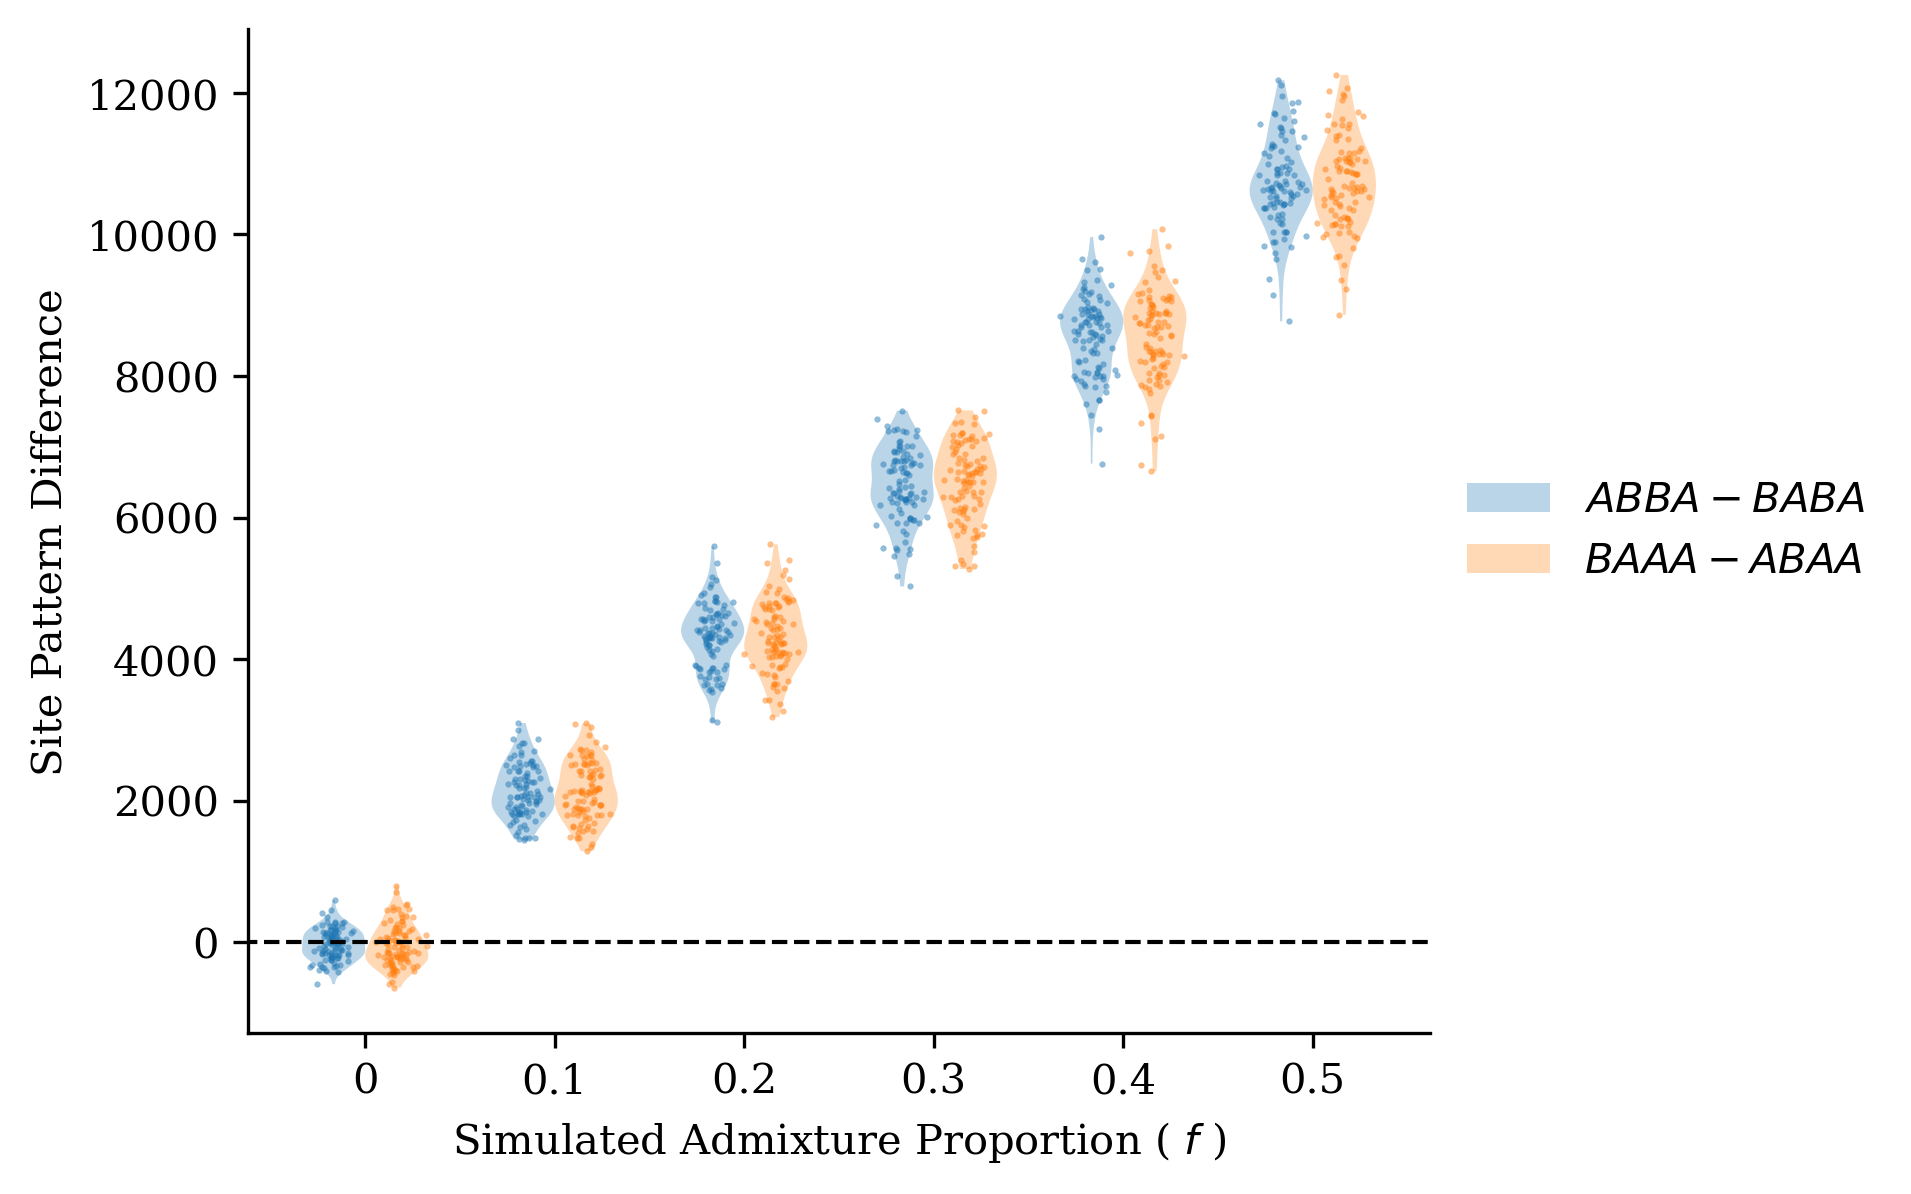

In [13]:
# Intialize list of x-axis tick labels.
big_x_ticks = [
    '0', '0.1', '0.2',
    '0.3', '0.4', '0.5',
]
# Set the center positions.
big_oirginal_pos = np.arange(0, 18, 3)
big_center_pos = (big_oirginal_pos + 0.5)
# Set the positions for the abba-baba results.
big_abba_baba_pos = big_oirginal_pos
# Set the positions for the baaa-abaa results.
big_baaa_abaa_pos = (big_oirginal_pos + 1)
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure.
fig = plt.figure(figsize=set_size(width_pt=452, fraction=1, subplots=(1, 1)), constrained_layout=True, dpi=300.0)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot horizontal line at y = 0.
ax.axhline(y=0, xmin=-1, xmax=16, color='black', linestyle='dashed', linewidth=1)
# Plot the results for the abba-baba statistic.
big_abba_baba_plot = ax.violinplot(big_abba_baba.tolist(), big_abba_baba_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in big_abba_baba_pos:
    # Grab the simulate data points.
    y = big_abba_baba[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:blue', marker='.', s=1, alpha=0.5)
# Plot the results for the Danc statistics.
big_baaa_abaa_plot = ax.violinplot(big_baaa_abaa.tolist(), big_baaa_abaa_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in big_baaa_abaa_pos:
    # Grab the simulate data points.
    y = big_baaa_abaa[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:orange', marker='.', s=1, alpha=0.5)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Make the legend.
ax.legend([big_abba_baba_plot['bodies'][0], big_baaa_abaa_plot['bodies'][0]], [r'$ABBA-BABA$', r'$BAAA-ABAA$'], loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Set the axes labels.
plt.xlabel('Simulated Admixture Proportion ( '+r'$f$'+' )')
plt.ylabel('Site Pattern Difference')
# Set the x-axis tick positions and labels.
ax.set_xticks(big_center_pos)
ax.set_xticklabels(big_x_ticks)
# Export figure.
#plt.savefig('./figures/big_site_pattern_diff.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show!
plt.show()

## Power to Detect Introgression

First, we calculate and load the power values for each admixture proportion.

In [14]:
# Load power values.
power_dict_f00 = calc_power(0.0)
power_dict_f01 = calc_power(0.01)
power_dict_f02 = calc_power(0.02)
power_dict_f03 = calc_power(0.03)
power_dict_f04 = calc_power(0.04)
power_dict_f05 = calc_power(0.05)
power_dict_f06 = calc_power(0.06)
power_dict_f07 = calc_power(0.07)
power_dict_f08 = calc_power(0.08)
power_dict_f09 = calc_power(0.09)
power_dict_f10 = calc_power(0.1)
power_dict_f20 = calc_power(0.2)
power_dict_f30 = calc_power(0.3)
power_dict_f40 = calc_power(0.4)
power_dict_f50 = calc_power(0.5)

Next, we calculate the power of each detection metric for the all admixture proportions.

In [15]:
# Create power arrays for the D statistic.
small_power_d = np.array([
    power_dict_f00['d'],
    power_dict_f01['d'],
    power_dict_f02['d'],
    power_dict_f03['d'],
    power_dict_f04['d'],
    power_dict_f05['d'],
    power_dict_f06['d'],
    power_dict_f07['d'],
    power_dict_f08['d'],
    power_dict_f09['d'],
    power_dict_f10['d'],
])
big_power_d = np.array([
    power_dict_f00['d'],
    power_dict_f10['d'],
    power_dict_f20['d'],
    power_dict_f30['d'],
    power_dict_f40['d'],
    power_dict_f50['d'],
])
# Create power arrays for the Danc statistic.
small_power_danc = np.array([
    power_dict_f00['danc'],
    power_dict_f01['danc'],
    power_dict_f02['danc'],
    power_dict_f03['danc'],
    power_dict_f04['danc'],
    power_dict_f05['danc'],
    power_dict_f06['danc'],
    power_dict_f07['danc'],
    power_dict_f08['danc'],
    power_dict_f09['danc'],
    power_dict_f10['danc'],
])
big_power_danc = np.array([
    power_dict_f00['danc'],
    power_dict_f10['danc'],
    power_dict_f20['danc'],
    power_dict_f30['danc'],
    power_dict_f40['danc'],
    power_dict_f50['danc'],
])
# Create power arrays for the D+ statistic.
small_power_dplus = np.array([
    power_dict_f00['dplus'],
    power_dict_f01['dplus'],
    power_dict_f02['dplus'],
    power_dict_f03['dplus'],
    power_dict_f04['dplus'],
    power_dict_f05['dplus'],
    power_dict_f06['dplus'],
    power_dict_f07['dplus'],
    power_dict_f08['dplus'],
    power_dict_f09['dplus'],
    power_dict_f10['dplus'],
])
big_power_dplus = np.array([
    power_dict_f00['dplus'],
    power_dict_f10['dplus'],
    power_dict_f20['dplus'],
    power_dict_f30['dplus'],
    power_dict_f40['dplus'],
    power_dict_f50['dplus'],
])
# Intialize an array of small admixture proportions.
small_admix_props = np.array([
    r'$f = 0$', r'$f = 0.01$', r'$f = 0.02$',
    r'$f = 0.03$', r'$f = 0.04$', r'$f = 0.05$',
    r'$f = 0.06$', r'$f = 0.07$', r'$f = 0.08$',
    r'$f = 0.09$', r'$f = 0.1$',
])
# Intialize an array of big admixture proportions.
big_admix_props = np.array([
    r'$f = 0$', r'$f = 0.1$', r'$f = 0.2$',
    r'$f = 0.3$', r'$f = 0.4$', r'$f = 0.5$',
])
# Create a pandas dataframe for the small admixture proportions results.
small_power_df = pd.DataFrame(
    data={
        r'$D$': small_power_d,
        r'$D_{anc}$': small_power_danc,
        r'$D+$': small_power_dplus,
    },
    index=small_admix_props,
)
small_power_df = small_power_df.style.format(precision=3)
# Write this pandas dataframe to a .tex file.
with open('./tables/small_power.tex', 'w') as tex_table:
    tex_table.write(small_power_df.to_latex(column_format='lccc', hrules=True))
# Create a pandas dataframe for the big admixture proportions results.
big_power_df = pd.DataFrame(
    data={
        r'$D$': big_power_d,
        r'$D_{anc}$': big_power_danc,
        r'$D+$': big_power_dplus,
    },
    index=big_admix_props,
)
big_power_df = big_power_df.style.format(precision=3)
# Write this pandas dataframe to a .tex file.
with open('./tables/big_power.tex', 'w') as tex_table:
    tex_table.write(big_power_df.to_latex(column_format='lccc', hrules=True))

Now we view the power results for the small admixture proportions.

In [16]:
# View the power results for f = 0 to f = 0.1 .
small_power_df

,$D$,$D_{anc}$,$D+$
$f = 0$,0.040,0.040,0.040
$f = 0.01$,0.330,0.270,0.320
$f = 0.02$,0.560,0.390,0.520
$f = 0.03$,0.870,0.630,0.860
$f = 0.04$,0.960,0.890,0.950
$f = 0.05$,0.990,0.920,0.990
$f = 0.06$,1.000,0.950,1.000
$f = 0.07$,1.000,0.970,1.000
$f = 0.08$,1.000,1.000,1.000
$f = 0.09$,1.000,1.000,1.000


Now we view the power results for the big admixture proportions.

In [17]:
# View the power results for f = 0 to f = 0.5 .
big_power_df

,$D$,$D_{anc}$,$D+$
$f = 0$,0.040,0.040,0.040
$f = 0.1$,1.000,1.000,1.000
$f = 0.2$,1.000,1.000,1.000
$f = 0.3$,1.000,1.000,1.000
$f = 0.4$,1.000,1.000,1.000
$f = 0.5$,1.000,1.000,1.000


Next, we consolidate the results for plotting.

In [18]:
# Consolidate the results for the D statistic.
small_d = [
    obs_dict_f00['d'],
    obs_dict_f01['d'],
    obs_dict_f02['d'],
    obs_dict_f03['d'],
    obs_dict_f04['d'],
    obs_dict_f05['d'],
    obs_dict_f06['d'],
    obs_dict_f07['d'],
    obs_dict_f08['d'],
    obs_dict_f09['d'],
    obs_dict_f10['d'],
]
big_d = [
    obs_dict_f00['d'],
    obs_dict_f10['d'],
    obs_dict_f20['d'],
    obs_dict_f30['d'],
    obs_dict_f40['d'],
    obs_dict_f50['d'],
]
# Consolidate the results for the Danc statistic.
small_danc = [
    obs_dict_f00['danc'],
    obs_dict_f01['danc'],
    obs_dict_f02['danc'],
    obs_dict_f03['danc'],
    obs_dict_f04['danc'],
    obs_dict_f05['danc'],
    obs_dict_f06['danc'],
    obs_dict_f07['danc'],
    obs_dict_f08['danc'],
    obs_dict_f09['danc'],
    obs_dict_f10['danc'],
]
big_danc = [
    obs_dict_f00['danc'],
    obs_dict_f10['danc'],
    obs_dict_f20['danc'],
    obs_dict_f30['danc'],
    obs_dict_f40['danc'],
    obs_dict_f50['danc'],
]
# Consolidate the results for the D+ statistic.
small_dplus = [
    obs_dict_f00['dplus'],
    obs_dict_f01['dplus'],
    obs_dict_f02['dplus'],
    obs_dict_f03['dplus'],
    obs_dict_f04['dplus'],
    obs_dict_f05['dplus'],
    obs_dict_f06['dplus'],
    obs_dict_f07['dplus'],
    obs_dict_f08['dplus'],
    obs_dict_f09['dplus'],
    obs_dict_f10['dplus'],
]
big_dplus = [
    obs_dict_f00['dplus'],
    obs_dict_f10['dplus'],
    obs_dict_f20['dplus'],
    obs_dict_f30['dplus'],
    obs_dict_f40['dplus'],
    obs_dict_f50['dplus'],
]

Now we plot the detection results!

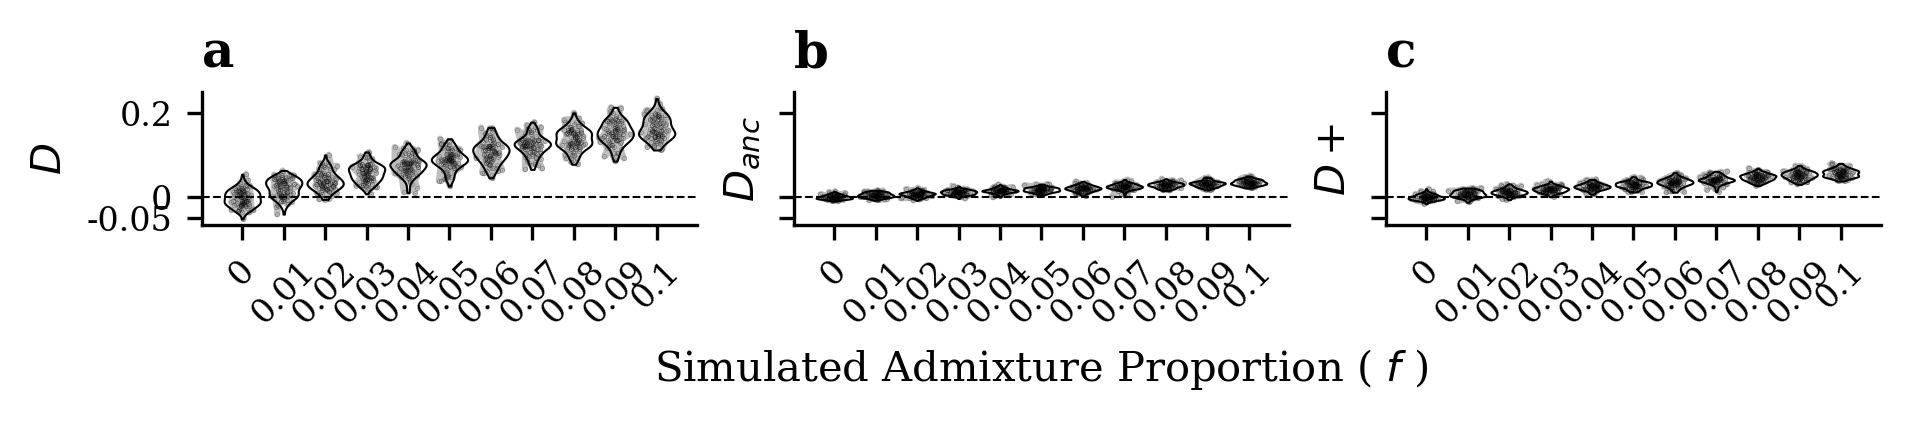

In [19]:
# Intialize the x-axis tick values.
small_x_ticks = np.arange(0, 22, 2)
# Intialize list of x-axis tick labels.
small_x_ticks_labels = [
    '0', '0.01', '0.02',
    '0.03', '0.04', '0.05',
    '0.06', '0.07', '0.08',
    '0.09', '0.1',
]
# Set y-axis tick values and labels.
small_y_ticks = [-0.05, 0, 0.2]
# Intialize font.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure and axes.
fig, axes = plt.subplots(1, 3, figsize=set_size(width_pt=452, fraction=1, subplots=(1, 3)), 
                         sharey=True, constrained_layout=True, dpi=300.0)
# Plot the results for the D statistic.
small_d_plot = axes[0].violinplot(small_d, small_x_ticks, showextrema=False, widths=1.75)
# Reset the face color, edge color, and alpha.
for pc in small_d_plot['bodies']:
    pc.set_facecolor('white')
    pc.set_edgecolor('black')
    pc.set_linewidth(0.5)
    pc.set_alpha(1)
# Plot horizontal line at y = 0.
axes[0].axhline(y=0, xmin=0, xmax=21, color='black', linestyle='dashed', linewidth=0.5)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in small_x_ticks:
    # Grab the simulate data points.
    y = small_d[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.25, size=len(y))
    # Plot the points!
    axes[0].plot(x, y, color='black', marker='.', alpha=0.25, markersize=0.5)
# Set the panel id.
axes[0].set_title('a', fontweight='bold', loc='left')
# Set the y-axis label.
axes[0].set_ylabel(r'$D$')
# Set the y-axis.
axes[0].set_yticks(small_y_ticks)
# Set the y-tick labels.
axes[0].set_yticklabels(small_y_ticks, size=8)
# Set the x-ticks.
axes[0].set_xticks(small_x_ticks)
# Set the x-tick labels.
axes[0].set_xticklabels(small_x_ticks_labels, rotation=45, size=8)
# Despine the axes.
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
# Plot the results for the Danc statistics.
small_danc_plot = axes[1].violinplot(small_danc, small_x_ticks, vert=True, showextrema=False, widths=1.75)
# Reset the face color, edge color, and alpha.
for pc in small_danc_plot['bodies']:
    pc.set_facecolor('white')
    pc.set_edgecolor('black')
    pc.set_linewidth(0.5)
    pc.set_alpha(1)
# Plot horizontal line at y = 0.
axes[1].axhline(y=0, xmin=0, xmax=21, color='black', linestyle='dashed', linewidth=0.5)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in small_x_ticks:
    # Grab the simulate data points.
    y = small_danc[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.25, size=len(y))
    # Plot the points!
    axes[1].plot(x, y, color='black', marker='.', alpha=0.25, markersize=0.5)
# Set the panel id.
axes[1].set_title('b', fontweight='bold', loc='left')
# Set the y-axis label.
axes[1].set_ylabel(r'$D_{anc}$')
# Set the x-axis label.
axes[1].set_xlabel('Simulated Admixture Proportion ( '+r'$f$'+' )')
# Set the x-ticks.
axes[1].set_xticks(small_x_ticks)
# Set the x-tick labels.
axes[1].set_xticklabels(small_x_ticks_labels, rotation=45, size=8)
# Despine the axes.
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
# Plot the results for the D+ statistics.
small_dplus_plot = axes[2].violinplot(small_dplus, small_x_ticks, vert=True, showextrema=False, widths=1.75)
# Reset the face color, edge color, and alpha.
for pc in small_dplus_plot['bodies']:
    pc.set_facecolor('white')
    pc.set_edgecolor('black')
    pc.set_linewidth(0.5)
    pc.set_alpha(1)
# Plot horizontal line at y = 0.
axes[2].axhline(y=0, xmin=0, xmax=21, color='black', linestyle='dashed', linewidth=0.5)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in small_x_ticks:
    # Grab the simulate data points.
    y = small_dplus[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.25, size=len(y))
    # Plot the points!
    axes[2].plot(x, y, color='black', marker='.', alpha=0.25, markersize=0.5)
# Set the panel id.
axes[2].set_title('c', fontweight='bold', loc='left')
# Set the y-axis label.
axes[2].set_ylabel(r'$D+$')
# Set the x-ticks.
axes[2].set_xticks(small_x_ticks)
# Set the x-tick labels.
axes[2].set_xticklabels(small_x_ticks_labels, rotation=45, size=8)
# Despine the axes.
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
# Export figure.
#plt.savefig('./small_d_danc_dplus.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
plt.show()

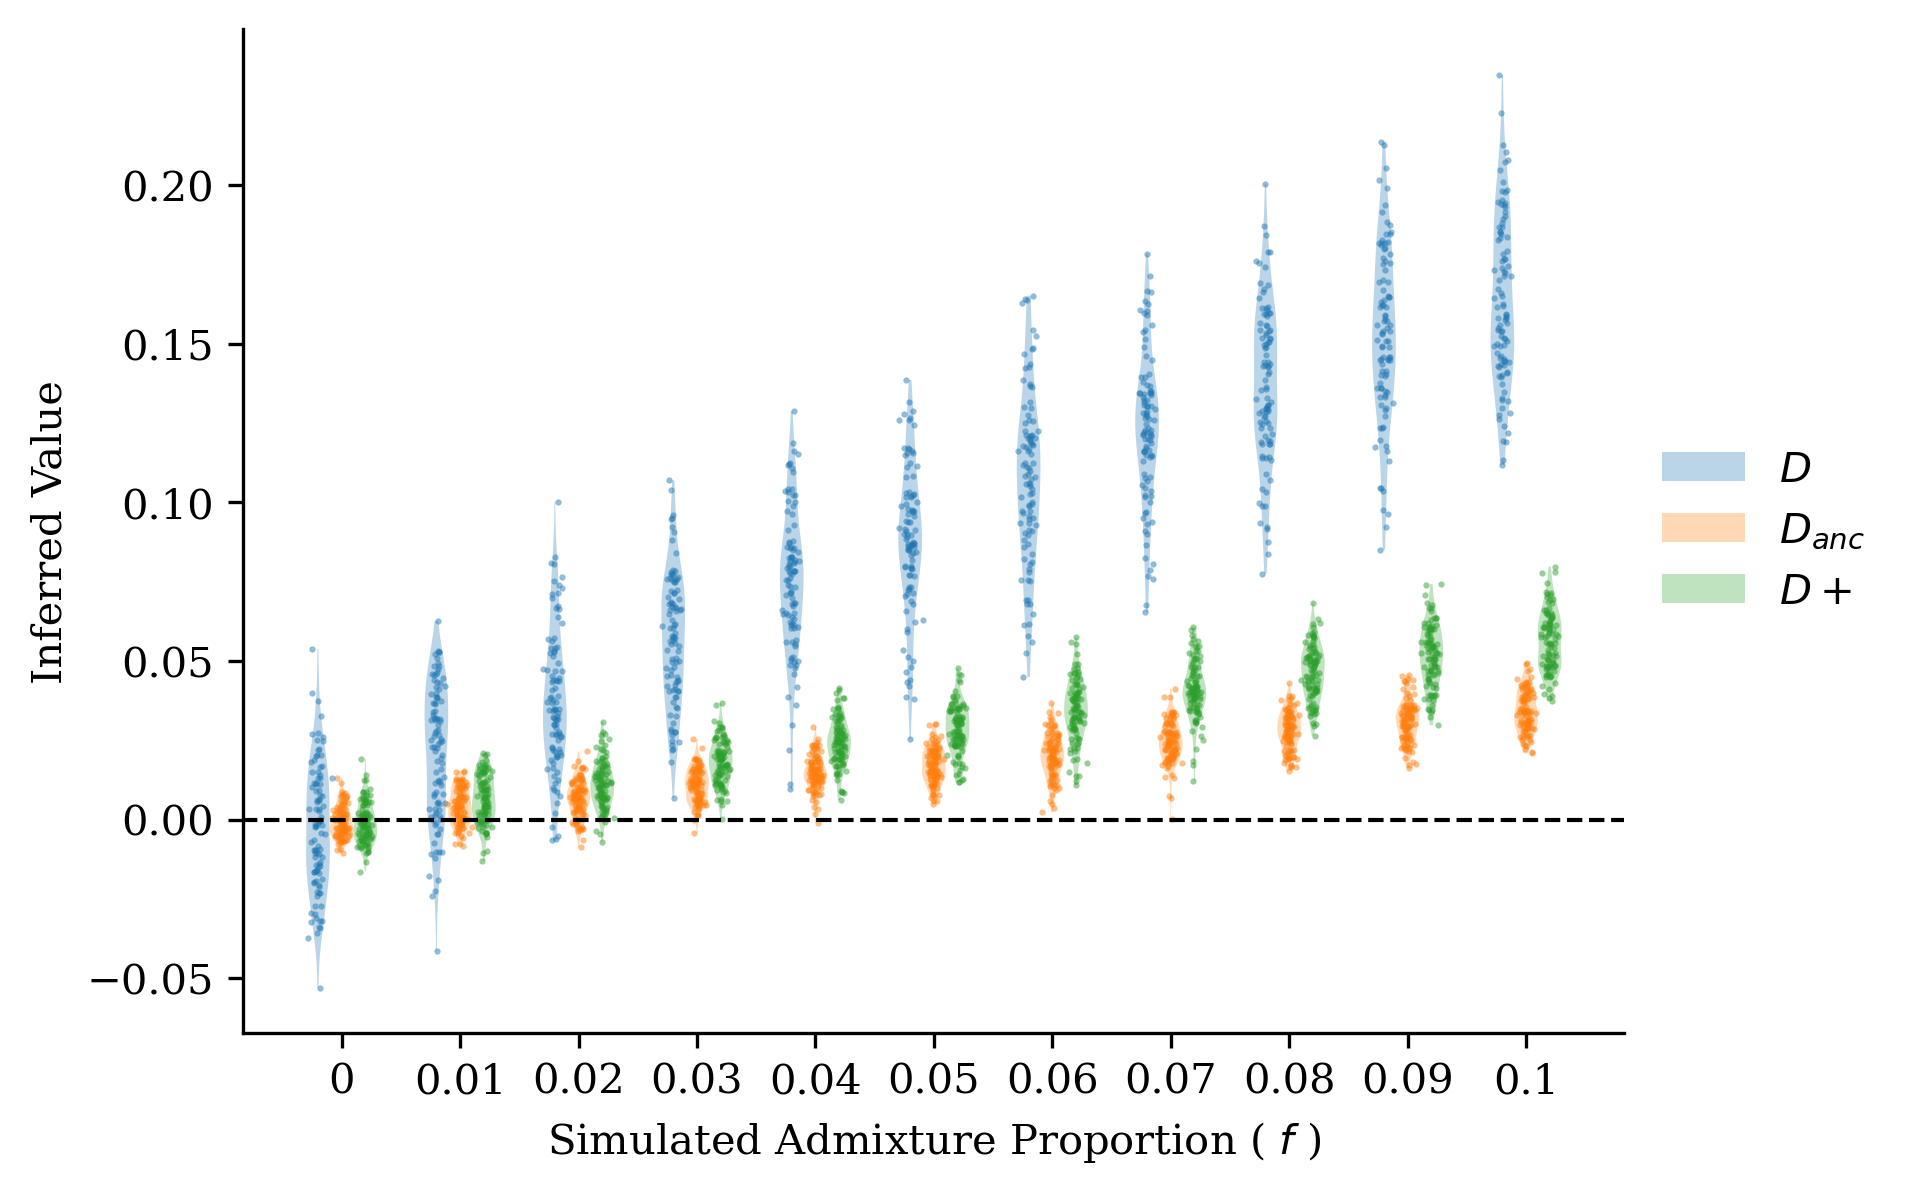

In [20]:
# Intialize list of x-axis tick labels.
small_x_ticks = [
    '0', '0.01', '0.02',
    '0.03', '0.04', '0.05',
    '0.06', '0.07', '0.08',
    '0.09', '0.1',
]
# Set the center positions.
small_center_pos = np.arange(0, 55, 5)
# Set the positions for the D results.
small_d_pos = (small_center_pos - 1)
# Set the positions for the Danc results.
small_danc_pos = small_center_pos
# Set the positions for the D+ results.
small_dplus_pos = (small_center_pos + 1)
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure.
fig = plt.figure(figsize=set_size(width_pt=452, fraction=1, subplots=(1, 1)), constrained_layout=True, dpi=300.0)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot horizontal line at y = 0.
ax.axhline(y=0, xmin=-1, xmax=52, color='black', linestyle='dashed', linewidth=1)
# Plot the results for the D statistic.
small_d_plot = ax.violinplot(small_d, small_d_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in small_d_pos:
    # Grab the simulate data points.
    y = small_d[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:blue', marker='.', s=1, alpha=0.5)
# Plot the results for the Danc statistics.
small_danc_plot = ax.violinplot(small_danc, small_danc_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in small_danc_pos:
    # Grab the simulate data points.
    y = small_danc[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:orange', marker='.', s=1, alpha=0.5)
# Plot the results for the D+ statistics.
small_dplus_plot = ax.violinplot(small_dplus, small_dplus_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in small_dplus_pos:
    # Grab the simulate data points.
    y = small_dplus[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:green', marker='.', s=1, alpha=0.5)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Make the legend.
ax.legend([small_d_plot['bodies'][0], small_danc_plot['bodies'][0], small_dplus_plot['bodies'][0]], [r'$D$', r'$D_{anc}$', r'$D+$'], loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Set the axes labels.
plt.xlabel('Simulated Admixture Proportion ( '+r'$f$'+' )')
plt.ylabel('Inferred Value')
# Set the x-axis tick positions and labels.
ax.set_xticks(small_center_pos)
ax.set_xticklabels(small_x_ticks)
# Export figure.
#plt.savefig('./figures/small_d_danc_dplus.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show!
plt.show()

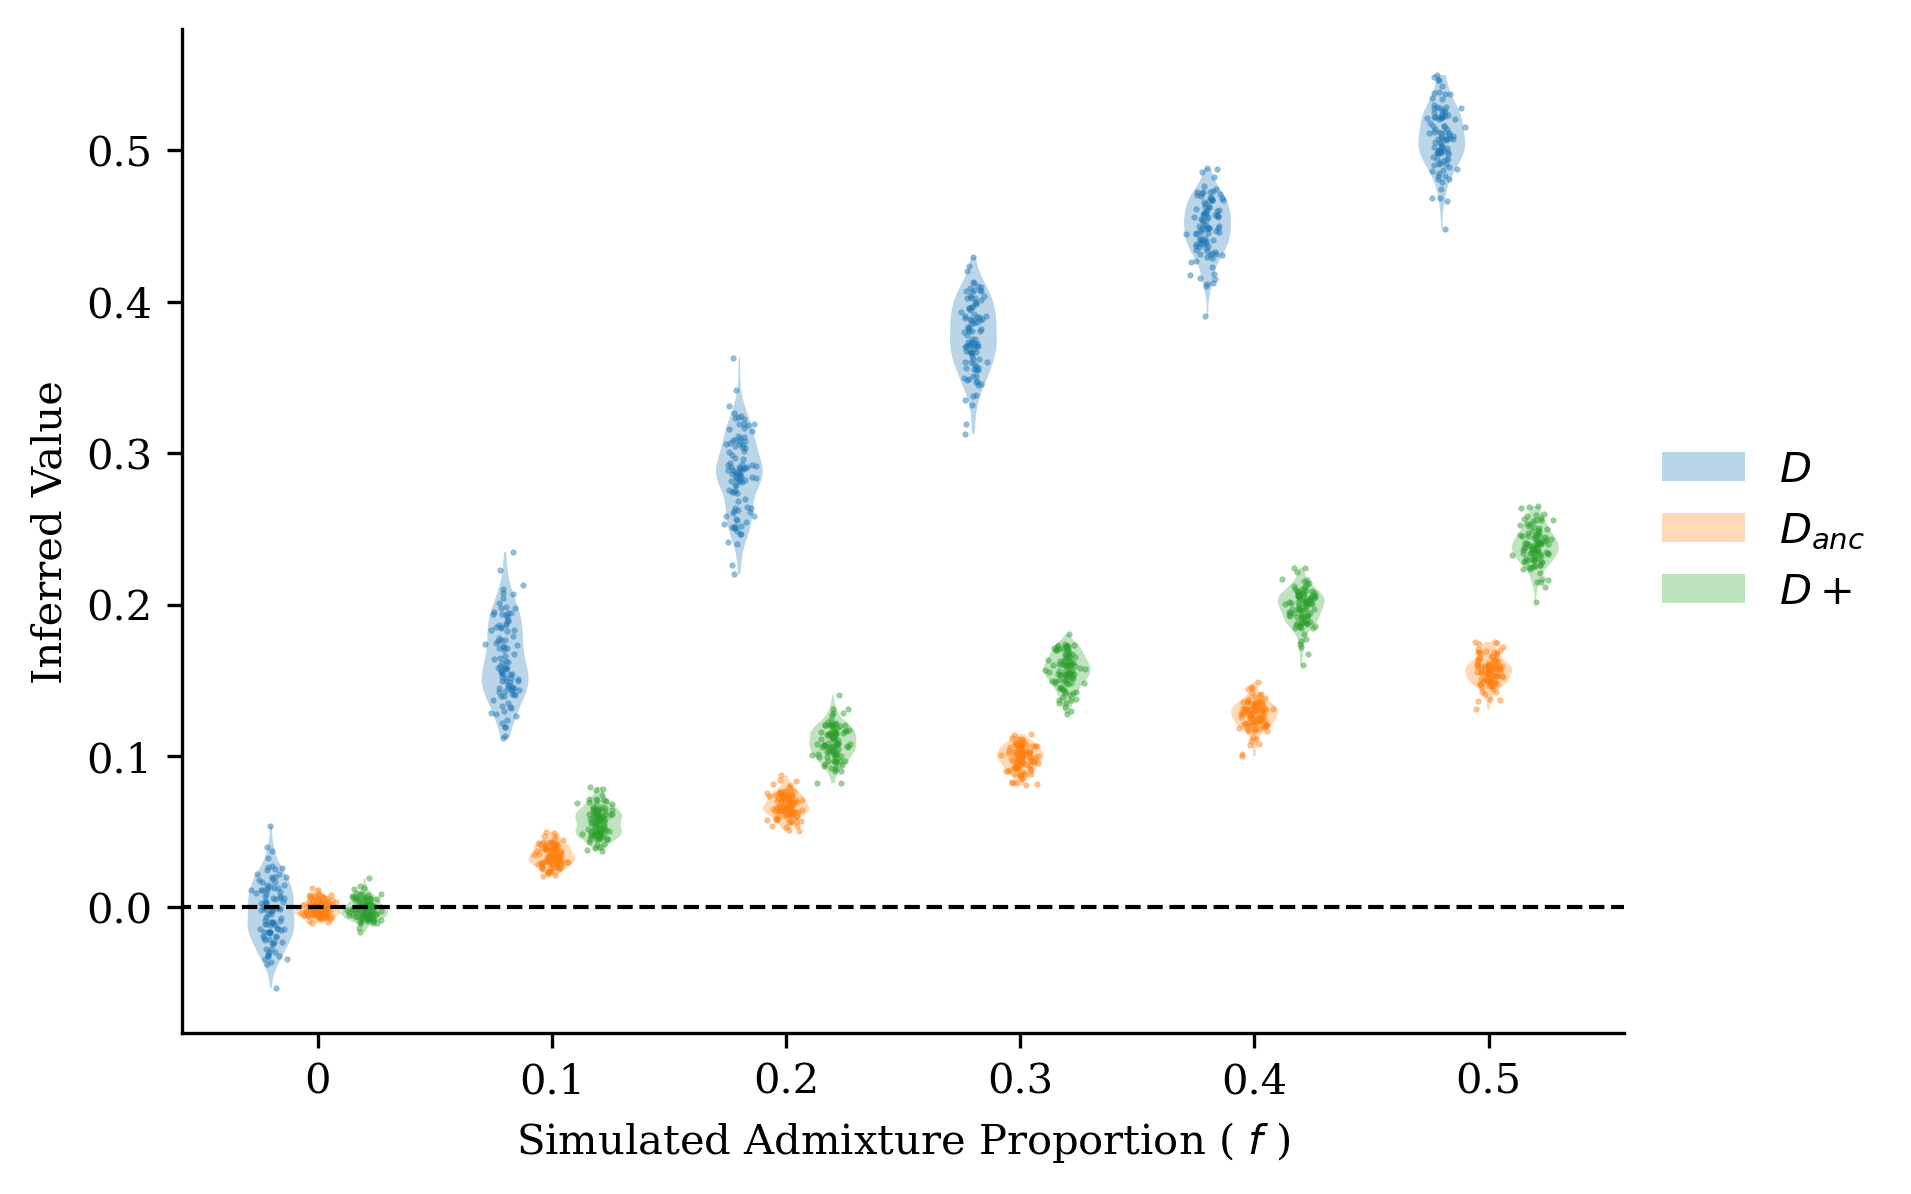

In [21]:
# Intialize list of x-axis tick labels.
big_x_ticks = [
    '0', '0.1', '0.2',
    '0.3', '0.4', '0.5',
]
# Set the center positions.
big_center_pos = np.arange(0, 30, 5)
# Set the positions for the D results.
big_d_pos = (big_center_pos - 1)
# Set the positions for the Danc results.
big_danc_pos = big_center_pos
# Set the positions for the D+ results.
big_dplus_pos = (big_center_pos + 1)
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure.
fig = plt.figure(figsize=set_size(width_pt=452, fraction=1, subplots=(1, 1)), constrained_layout=True, dpi=300.0)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot horizontal line at y = 0.
ax.axhline(y=0, xmin=-1, xmax=27, color='black', linestyle='dashed', linewidth=1)
# Plot the results for the D statistic.
big_d_plot = ax.violinplot(big_d, big_d_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in big_d_pos:
    # Grab the simulate data points.
    y = big_d[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:blue', marker='.', s=1, alpha=0.5)
# Plot the results for the Danc statistics.
big_danc_plot = ax.violinplot(big_danc, big_danc_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in big_danc_pos:
    # Grab the simulate data points.
    y = big_danc[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:orange', marker='.', s=1, alpha=0.5)
# Plot the results for the D+ statistics.
big_dplus_plot = ax.violinplot(big_dplus, big_dplus_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in big_dplus_pos:
    # Grab the simulate data points.
    y = big_dplus[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:green', marker='.', s=1, alpha=0.5)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Make the legend.
ax.legend([big_d_plot['bodies'][0], big_danc_plot['bodies'][0], big_dplus_plot['bodies'][0]], [r'$D$', r'$D_{anc}$', r'$D+$'], loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Set the axes labels.
plt.xlabel('Simulated Admixture Proportion ( '+r'$f$'+' )')
plt.ylabel('Inferred Value')
# Set the x-axis tick positions and labels.
ax.set_xticks(big_center_pos)
ax.set_xticklabels(big_x_ticks)
# Export figure.
#plt.savefig('./figures/big_d_danc_dplus.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show!
plt.show()

## Power to Quantify Introgression

First, we calculate the RMSE for all quantification metrics across all admixture proportions.

In [22]:
# Create rmse arrays for the fhom statistic.
small_rmse_fhom = np.array([
    np.sqrt(np.mean(np.square((obs_dict_f00['fhom'] - 0)))),
    np.sqrt(np.mean(np.square((obs_dict_f01['fhom'] - 0.01)))),
    np.sqrt(np.mean(np.square((obs_dict_f02['fhom'] - 0.02)))),
    np.sqrt(np.mean(np.square((obs_dict_f03['fhom'] - 0.03)))),
    np.sqrt(np.mean(np.square((obs_dict_f04['fhom'] - 0.04)))),
    np.sqrt(np.mean(np.square((obs_dict_f05['fhom'] - 0.05)))),
    np.sqrt(np.mean(np.square((obs_dict_f06['fhom'] - 0.06)))),
    np.sqrt(np.mean(np.square((obs_dict_f07['fhom'] - 0.07)))),
    np.sqrt(np.mean(np.square((obs_dict_f08['fhom'] - 0.08)))),
    np.sqrt(np.mean(np.square((obs_dict_f09['fhom'] - 0.09)))),
    np.sqrt(np.mean(np.square((obs_dict_f10['fhom'] - 0.1)))),
])
big_rmse_fhom = np.array([
    np.sqrt(np.mean(np.square((obs_dict_f00['fhom'] - 0)))),
    np.sqrt(np.mean(np.square((obs_dict_f10['fhom'] - 0.1)))),
    np.sqrt(np.mean(np.square((obs_dict_f20['fhom'] - 0.2)))),
    np.sqrt(np.mean(np.square((obs_dict_f30['fhom'] - 0.3)))),
    np.sqrt(np.mean(np.square((obs_dict_f40['fhom'] - 0.4)))),
    np.sqrt(np.mean(np.square((obs_dict_f50['fhom'] - 0.5)))),
])
# Create rmse arrays for the fanc statistic.
small_rmse_fanc = np.array([
    np.sqrt(np.mean(np.square((obs_dict_f00['fanc'] - 0)))),
    np.sqrt(np.mean(np.square((obs_dict_f01['fanc'] - 0.01)))),
    np.sqrt(np.mean(np.square((obs_dict_f02['fanc'] - 0.02)))),
    np.sqrt(np.mean(np.square((obs_dict_f03['fanc'] - 0.03)))),
    np.sqrt(np.mean(np.square((obs_dict_f04['fanc'] - 0.04)))),
    np.sqrt(np.mean(np.square((obs_dict_f05['fanc'] - 0.05)))),
    np.sqrt(np.mean(np.square((obs_dict_f06['fanc'] - 0.06)))),
    np.sqrt(np.mean(np.square((obs_dict_f07['fanc'] - 0.07)))),
    np.sqrt(np.mean(np.square((obs_dict_f08['fanc'] - 0.08)))),
    np.sqrt(np.mean(np.square((obs_dict_f09['fanc'] - 0.09)))),
    np.sqrt(np.mean(np.square((obs_dict_f10['fanc'] - 0.1)))),
])
big_rmse_fanc = np.array([
    np.sqrt(np.mean(np.square((obs_dict_f00['fanc'] - 0)))),
    np.sqrt(np.mean(np.square((obs_dict_f10['fanc'] - 0.1)))),
    np.sqrt(np.mean(np.square((obs_dict_f20['fanc'] - 0.2)))),
    np.sqrt(np.mean(np.square((obs_dict_f30['fanc'] - 0.3)))),
    np.sqrt(np.mean(np.square((obs_dict_f40['fanc'] - 0.4)))),
    np.sqrt(np.mean(np.square((obs_dict_f50['fanc'] - 0.5)))),
])
# Create rmse arrays for the fplus statistic.
small_rmse_fplus = np.array([
    np.sqrt(np.mean(np.square((obs_dict_f00['fplus'] - 0)))),
    np.sqrt(np.mean(np.square((obs_dict_f01['fplus'] - 0.01)))),
    np.sqrt(np.mean(np.square((obs_dict_f02['fplus'] - 0.02)))),
    np.sqrt(np.mean(np.square((obs_dict_f03['fplus'] - 0.03)))),
    np.sqrt(np.mean(np.square((obs_dict_f04['fplus'] - 0.04)))),
    np.sqrt(np.mean(np.square((obs_dict_f05['fplus'] - 0.05)))),
    np.sqrt(np.mean(np.square((obs_dict_f06['fplus'] - 0.06)))),
    np.sqrt(np.mean(np.square((obs_dict_f07['fplus'] - 0.07)))),
    np.sqrt(np.mean(np.square((obs_dict_f08['fplus'] - 0.08)))),
    np.sqrt(np.mean(np.square((obs_dict_f09['fplus'] - 0.09)))),
    np.sqrt(np.mean(np.square((obs_dict_f10['fplus'] - 0.1)))),
])
big_rmse_fplus = np.array([
    np.sqrt(np.mean(np.square((obs_dict_f00['fplus'] - 0)))),
    np.sqrt(np.mean(np.square((obs_dict_f10['fplus'] - 0.1)))),
    np.sqrt(np.mean(np.square((obs_dict_f20['fplus'] - 0.2)))),
    np.sqrt(np.mean(np.square((obs_dict_f30['fplus'] - 0.3)))),
    np.sqrt(np.mean(np.square((obs_dict_f40['fplus'] - 0.4)))),
    np.sqrt(np.mean(np.square((obs_dict_f50['fplus'] - 0.5)))),
])

Next, we calculate the MAE for all quantification metrics across all admixture proportions.

In [23]:
# Create mae arrays for the fhom statistic.
small_mae_fhom = np.array([
    np.mean(np.abs((obs_dict_f00['fhom'] - 0))),
    np.mean(np.abs((obs_dict_f01['fhom'] - 0.01))),
    np.mean(np.abs((obs_dict_f02['fhom'] - 0.02))),
    np.mean(np.abs((obs_dict_f03['fhom'] - 0.03))),
    np.mean(np.abs((obs_dict_f04['fhom'] - 0.04))),
    np.mean(np.abs((obs_dict_f05['fhom'] - 0.05))),
    np.mean(np.abs((obs_dict_f06['fhom'] - 0.06))),
    np.mean(np.abs((obs_dict_f07['fhom'] - 0.07))),
    np.mean(np.abs((obs_dict_f08['fhom'] - 0.08))),
    np.mean(np.abs((obs_dict_f09['fhom'] - 0.09))),
    np.mean(np.abs((obs_dict_f10['fhom'] - 0.1))),
])
big_mae_fhom = np.array([
    np.mean(np.abs((obs_dict_f00['fhom'] - 0))),
    np.mean(np.abs((obs_dict_f10['fhom'] - 0.1))),
    np.mean(np.abs((obs_dict_f20['fhom'] - 0.2))),
    np.mean(np.abs((obs_dict_f30['fhom'] - 0.3))),
    np.mean(np.abs((obs_dict_f40['fhom'] - 0.4))),
    np.mean(np.abs((obs_dict_f50['fhom'] - 0.5))),
])
# Create mae arrays for the fanc statistic.
small_mae_fanc = np.array([
    np.mean(np.abs((obs_dict_f00['fanc'] - 0))),
    np.mean(np.abs((obs_dict_f01['fanc'] - 0.01))),
    np.mean(np.abs((obs_dict_f02['fanc'] - 0.02))),
    np.mean(np.abs((obs_dict_f03['fanc'] - 0.03))),
    np.mean(np.abs((obs_dict_f04['fanc'] - 0.04))),
    np.mean(np.abs((obs_dict_f05['fanc'] - 0.05))),
    np.mean(np.abs((obs_dict_f06['fanc'] - 0.06))),
    np.mean(np.abs((obs_dict_f07['fanc'] - 0.07))),
    np.mean(np.abs((obs_dict_f08['fanc'] - 0.08))),
    np.mean(np.abs((obs_dict_f09['fanc'] - 0.09))),
    np.mean(np.abs((obs_dict_f10['fanc'] - 0.1))),
])
big_mae_fanc = np.array([
    np.mean(np.abs((obs_dict_f00['fanc'] - 0))),
    np.mean(np.abs((obs_dict_f10['fanc'] - 0.1))),
    np.mean(np.abs((obs_dict_f20['fanc'] - 0.2))),
    np.mean(np.abs((obs_dict_f30['fanc'] - 0.3))),
    np.mean(np.abs((obs_dict_f40['fanc'] - 0.4))),
    np.mean(np.abs((obs_dict_f50['fanc'] - 0.5))),
])
# Create mae arrays for the fplus statistic.
small_mae_fplus = np.array([
    np.mean(np.abs((obs_dict_f00['fplus'] - 0))),
    np.mean(np.abs((obs_dict_f01['fplus'] - 0.01))),
    np.mean(np.abs((obs_dict_f02['fplus'] - 0.02))),
    np.mean(np.abs((obs_dict_f03['fplus'] - 0.03))),
    np.mean(np.abs((obs_dict_f04['fplus'] - 0.04))),
    np.mean(np.abs((obs_dict_f05['fplus'] - 0.05))),
    np.mean(np.abs((obs_dict_f06['fplus'] - 0.06))),
    np.mean(np.abs((obs_dict_f07['fplus'] - 0.07))),
    np.mean(np.abs((obs_dict_f08['fplus'] - 0.08))),
    np.mean(np.abs((obs_dict_f09['fplus'] - 0.09))),
    np.mean(np.abs((obs_dict_f10['fplus'] - 0.1))),
])
big_mae_fplus = np.array([
    np.mean(np.abs((obs_dict_f00['fplus'] - 0))),
    np.mean(np.abs((obs_dict_f10['fplus'] - 0.1))),
    np.mean(np.abs((obs_dict_f20['fplus'] - 0.2))),
    np.mean(np.abs((obs_dict_f30['fplus'] - 0.3))),
    np.mean(np.abs((obs_dict_f40['fplus'] - 0.4))),
    np.mean(np.abs((obs_dict_f50['fplus'] - 0.5))),
])

Lastly, we compile the RMSE and MAE results.

In [24]:
# Intialize an array of small admixture proportions.
small_admix_props = np.array([
    r'$f = 0$', r'$f = 0.01$', r'$f = 0.02$',
    r'$f = 0.03$', r'$f = 0.04$', r'$f = 0.05$',
    r'$f = 0.06$', r'$f = 0.07$', r'$f = 0.08$',
    r'$f = 0.09$', r'$f = 0.1$',
])
# Intialize an array of big admixture proportions.
big_admix_props = np.array([
    r'$f = 0$', r'$f = 0.1$', r'$f = 0.2$',
    r'$f = 0.3$', r'$f = 0.4$', r'$f = 0.5$',
])
# Create a pandas dataframe for the small admixture proportions results.
small_rmse_mae_df = pd.DataFrame(
    data={
        r'$f_{hom}\;(RMSE)$': small_rmse_fhom,
        r'$f_{hom}\;(MAE)$': small_mae_fhom,
        r'$f_{anc}\;(RMSE)$': small_rmse_fanc,
        r'$f_{anc}\;(MAE)$': small_mae_fanc,
        r'$f+\;(RMSE)$': small_rmse_fplus,
        r'$f+\;(MAE)$': small_mae_fplus,
    },
    index=small_admix_props,
)
small_rmse_mae_df = small_rmse_mae_df.style.format(precision=3)
# Write this pandas dataframe to a .tex file.
with open('./tables/small_rmse_mae.tex', 'w') as tex_table:
    tex_table.write(small_rmse_mae_df.to_latex(column_format='lcccccc', hrules=True))
# Create a pandas dataframe for the big admixture proportions results.
big_rmse_mae_df = pd.DataFrame(
    data={
        r'$f_{hom}\;(RMSE)$': big_rmse_fhom,
        r'$f_{hom}\;(MAE)$': big_mae_fhom,
        r'$f_{anc}\;(RMSE)$': big_rmse_fanc,
        r'$f_{anc}\;(MAE)$': big_mae_fanc,
        r'$f+\;(RMSE)$': big_rmse_fplus,
        r'$f+\;(MAE)$': big_mae_fplus,
    },
    index=big_admix_props,
)
big_rmse_mae_df = big_rmse_mae_df.style.format(precision=3)
# Write this pandas dataframe to a .tex file.
with open('./tables/big_rmse_mae.tex', 'w') as tex_table:
    tex_table.write(big_rmse_mae_df.to_latex(column_format='lcccccc', hrules=True))

Now we view the RMSE and MAE results for the small admixture proportions.

In [25]:
# View the rmse results for f = 0 to f = 0.1 .
small_rmse_mae_df

,$f_{hom}\;(RMSE)$,$f_{hom}\;(MAE)$,$f_{anc}\;(RMSE)$,$f_{anc}\;(MAE)$,$f+\;(RMSE)$,$f+\;(MAE)$
$f = 0$,0.004,0.003,0.006,0.005,0.004,0.003
$f = 0.01$,0.007,0.006,0.008,0.007,0.007,0.006
$f = 0.02$,0.013,0.012,0.014,0.013,0.013,0.012
$f = 0.03$,0.018,0.018,0.019,0.018,0.018,0.018
$f = 0.04$,0.024,0.024,0.024,0.023,0.024,0.023
$f = 0.05$,0.031,0.030,0.031,0.030,0.031,0.030
$f = 0.06$,0.036,0.036,0.038,0.037,0.037,0.036
$f = 0.07$,0.042,0.042,0.042,0.042,0.042,0.042
$f = 0.08$,0.048,0.048,0.048,0.048,0.048,0.048
$f = 0.09$,0.054,0.054,0.055,0.054,0.054,0.054


Now we view the RMSE and MAE results for the big admixture proportions.

In [26]:
# View the rmse results for f = 0 to f = 0.5 .
big_rmse_mae_df

,$f_{hom}\;(RMSE)$,$f_{hom}\;(MAE)$,$f_{anc}\;(RMSE)$,$f_{anc}\;(MAE)$,$f+\;(RMSE)$,$f+\;(MAE)$
$f = 0$,0.004,0.003,0.006,0.005,0.004,0.003
$f = 0.1$,0.061,0.060,0.061,0.060,0.061,0.060
$f = 0.2$,0.120,0.120,0.120,0.120,0.120,0.120
$f = 0.3$,0.181,0.180,0.180,0.180,0.180,0.180
$f = 0.4$,0.241,0.241,0.242,0.241,0.241,0.241
$f = 0.5$,0.302,0.301,0.301,0.301,0.301,0.301


Next, we consolidate the results for plotting.

In [27]:
# Consolidate the results for the fhom statistic.
small_fhom = [
    obs_dict_f00['fhom'],
    obs_dict_f01['fhom'],
    obs_dict_f02['fhom'],
    obs_dict_f03['fhom'],
    obs_dict_f04['fhom'],
    obs_dict_f05['fhom'],
    obs_dict_f06['fhom'],
    obs_dict_f07['fhom'],
    obs_dict_f08['fhom'],
    obs_dict_f09['fhom'],
    obs_dict_f10['fhom'],
]
big_fhom = [
    obs_dict_f00['fhom'],
    obs_dict_f10['fhom'],
    obs_dict_f20['fhom'],
    obs_dict_f30['fhom'],
    obs_dict_f40['fhom'],
    obs_dict_f50['fhom'],
]
# Consolidate the results for the fanc statistic.
small_fanc = [
    obs_dict_f00['fanc'],
    obs_dict_f01['fanc'],
    obs_dict_f02['fanc'],
    obs_dict_f03['fanc'],
    obs_dict_f04['fanc'],
    obs_dict_f05['fanc'],
    obs_dict_f06['fanc'],
    obs_dict_f07['fanc'],
    obs_dict_f08['fanc'],
    obs_dict_f09['fanc'],
    obs_dict_f10['fanc'],
]
big_fanc = [
    obs_dict_f00['fanc'],
    obs_dict_f10['fanc'],
    obs_dict_f20['fanc'],
    obs_dict_f30['fanc'],
    obs_dict_f40['fanc'],
    obs_dict_f50['fanc'],
]
# Consolidate the results for the f+ statistic.
small_fplus = [
    obs_dict_f00['fplus'],
    obs_dict_f01['fplus'],
    obs_dict_f02['fplus'],
    obs_dict_f03['fplus'],
    obs_dict_f04['fplus'],
    obs_dict_f05['fplus'],
    obs_dict_f06['fplus'],
    obs_dict_f07['fplus'],
    obs_dict_f08['fplus'],
    obs_dict_f09['fplus'],
    obs_dict_f10['fplus'],
]
big_fplus = [
    obs_dict_f00['fplus'],
    obs_dict_f10['fplus'],
    obs_dict_f20['fplus'],
    obs_dict_f30['fplus'],
    obs_dict_f40['fplus'],
    obs_dict_f50['fplus'],
]

Lastly, we plot!

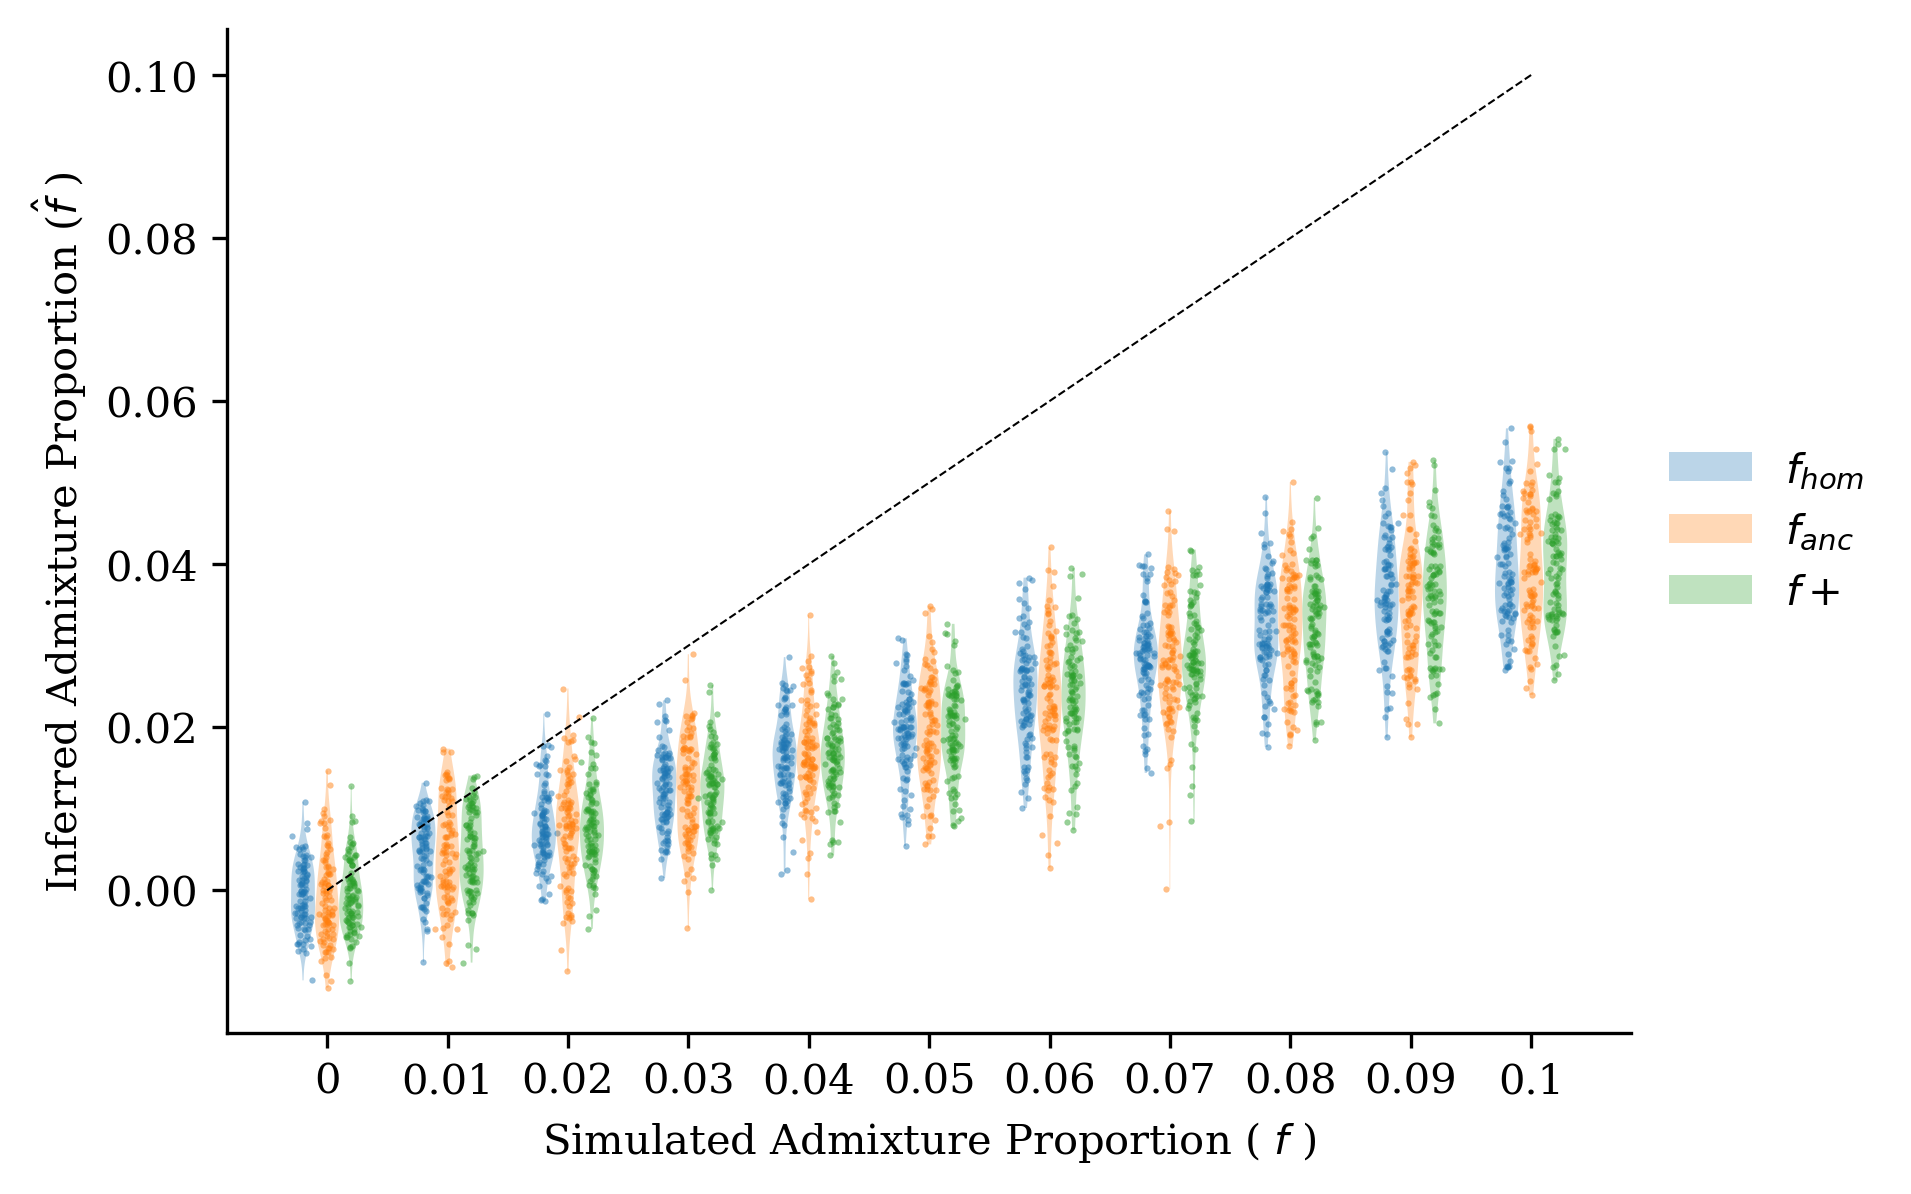

In [28]:
# Intialize list of x-axis tick labels.
small_x_ticks = [
    '0', '0.01', '0.02',
    '0.03', '0.04', '0.05',
    '0.06', '0.07', '0.08',
    '0.09', '0.1',
]
# Intalize the admixture proportions for plotting.
f_vals = [
    0,
    0.01, 0.02, 0.03,
    0.04, 0.05, 0.06,
    0.07, 0.08, 0.09,
    0.1,
]
# Set the center positions.
small_center_pos = np.arange(0, 55, 5)
# Set the positions for the D results.
small_fhom_pos = (small_center_pos - 1)
# Set the positions for the Danc results.
small_fanc_pos = small_center_pos
# Set the positions for the D+ results.
small_fplus_pos = (small_center_pos + 1)
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure.
fig = plt.figure(figsize=set_size(width_pt=452, fraction=1, subplots=(1, 1)), constrained_layout=True, dpi=300.0)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot the line f = hat(f).
ax.plot(small_center_pos, f_vals, color='black', linestyle='dashed', linewidth=0.5)
# Plot the results for the D statistic.
small_fhom_plot = ax.violinplot(small_fhom, small_fhom_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in small_fhom_pos:
    # Grab the simulate data points.
    y = small_fhom[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:blue', marker='.', s=1, alpha=0.5)
# Plot the results for the Danc statistics.
small_fanc_plot = ax.violinplot(small_fanc, small_fanc_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in small_fanc_pos:
    # Grab the simulate data points.
    y = small_fanc[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:orange', marker='.', s=1, alpha=0.5)
# Plot the results for the D+ statistics.
small_fplus_plot = ax.violinplot(small_fplus, small_fplus_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in small_fplus_pos:
    # Grab the simulate data points.
    y = small_fplus[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:green', marker='.', s=1, alpha=0.5)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Make the legend.
ax.legend([small_fhom_plot['bodies'][0], small_fanc_plot['bodies'][0], small_fplus_plot['bodies'][0]], [r'$f_{hom}$', r'$f_{anc}$', r'$f+$'], loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Set the axes labels.
plt.xlabel('Simulated Admixture Proportion ( '+r'$f$'+' )')
plt.ylabel('Inferred Admixture Proportion ('+r'$\hat{f}$'+' )')
# Set the x-axis tick positions and labels.
ax.set_xticks(small_center_pos)
ax.set_xticklabels(small_x_ticks)
# Export figure.
#plt.savefig('./figures/small_fhom_fanc_fplus.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show!
plt.show()

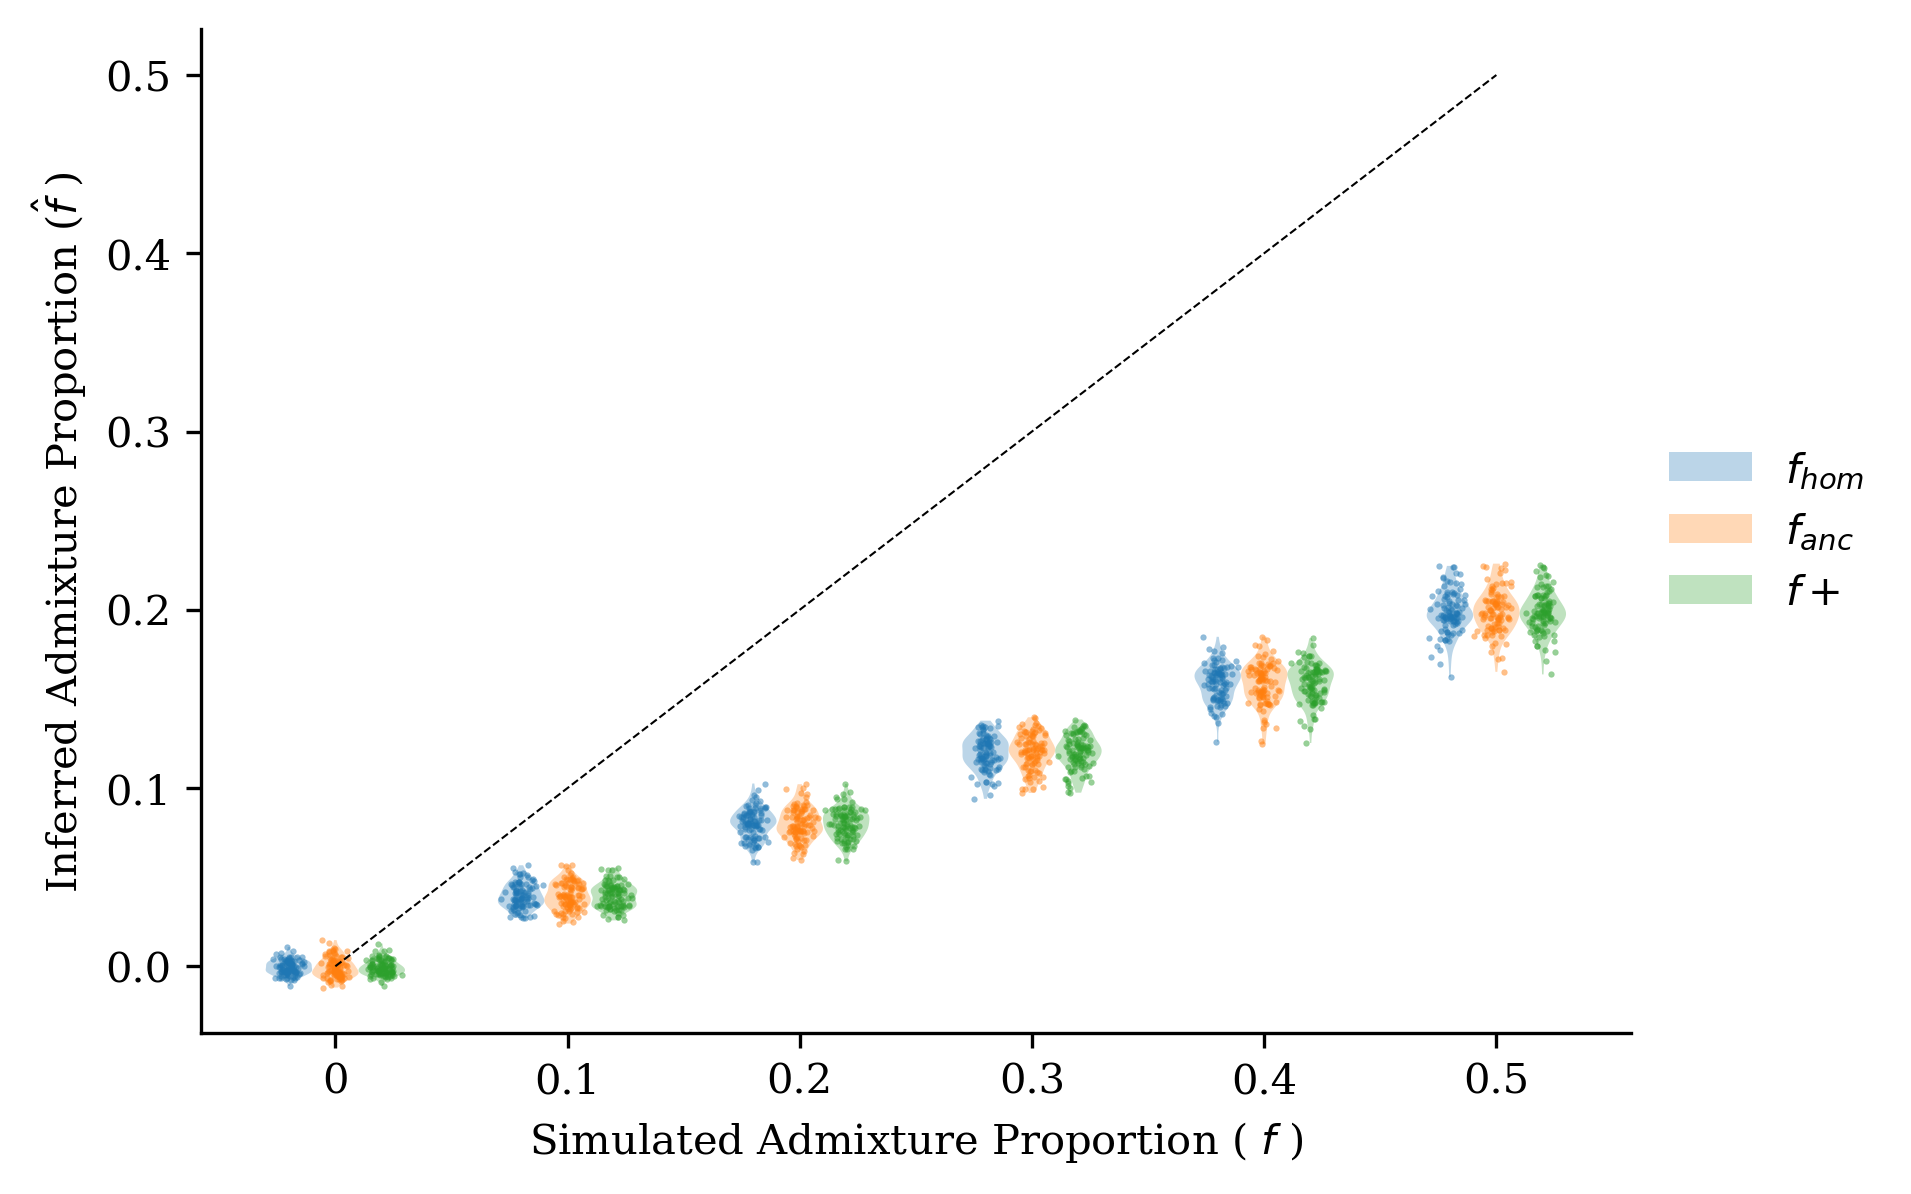

In [29]:
# Intialize list of x-axis tick labels.
big_x_ticks = [
    '0', '0.1', '0.2',
    '0.3', '0.4', '0.5',
]
# Intalize the admixture proportions for plotting.
f_vals = [
    0, 0.1, 0.2,
    0.3, 0.4, 0.5,
]
# Set the center positions.
big_center_pos = np.arange(0, 30, 5)
# Set the positions for the D results.
big_fhom_pos = (big_center_pos - 1)
# Set the positions for the Danc results.
big_fanc_pos = big_center_pos
# Set the positions for the D+ results.
big_fplus_pos = (big_center_pos + 1)
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure.
fig = plt.figure(figsize=set_size(width_pt=452, fraction=1, subplots=(1, 1)), constrained_layout=True, dpi=300.0)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot the line f = hat(f).
ax.plot(big_center_pos, f_vals, color='black', linestyle='dashed', linewidth=0.5)
# Plot the results for the D statistic.
big_fhom_plot = ax.violinplot(big_fhom, big_fhom_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in big_fhom_pos:
    # Grab the simulate data points.
    y = big_fhom[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:blue', marker='.', s=1, alpha=0.5)
# Plot the results for the Danc statistics.
big_fanc_plot = ax.violinplot(big_fanc, big_fanc_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in big_fanc_pos:
    # Grab the simulate data points.
    y = big_fanc[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:orange', marker='.', s=1, alpha=0.5)
# Plot the results for the D+ statistics.
big_fplus_plot = ax.violinplot(big_fplus, big_fplus_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in big_fplus_pos:
    # Grab the simulate data points.
    y = big_fplus[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:green', marker='.', s=1, alpha=0.5)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Make the legend.
ax.legend([big_fhom_plot['bodies'][0], big_fanc_plot['bodies'][0], big_fplus_plot['bodies'][0]], [r'$f_{hom}$', r'$f_{anc}$', r'$f+$'], loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Set the axes labels.
plt.xlabel('Simulated Admixture Proportion ( '+r'$f$'+' )')
plt.ylabel('Inferred Admixture Proportion ('+r'$\hat{f}$'+' )')
# Set the x-axis tick positions and labels.
ax.set_xticks(big_center_pos)
ax.set_xticklabels(big_x_ticks)
# Export figure.
#plt.savefig('./figures/big_fhom_fanc_fplus.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show!
plt.show()